# Очистка и визуализация данных
##    Данные по загрязнению морей России

Целью данного блокнота является очистка и подготовка данных по загрязнению морей России, взятых с открытой базы данных сайта
портала "Единая государственная система информации об обстановке  в мировом океане"
http://esimo.ru/portal/portal/esimo-user/main



Начнем с импортирования основых модулей для работы и посмотрим на данный csv файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pollution_raw = pd.read_csv('pollution.csv')
print(pollution_raw.shape)

(727, 15)


Как видно датесэт имеет 15 колонок и 727 строк.Посмотрим на сэмпл из пяти строк

In [3]:
pollution_raw.sample(5)

,Единица данных: идентификатор,Единица данных: количество,Показатель,Описание,Геообъект: идентификатор,Геообъект: название,Геообъект: код,"Долгота точки (град., дес.доли град)","Широта точки (град., дес.доли град)",Параметр: код,Параметр: значение,Параметр: значение (max),Параметр: значение (min),Единица измерения,Год
522,1128,114,100.00,Акватория,1510,Чёрное море,30,38.1958,43.6883,СПАВ,3.5965,15.00,0.000,мкг/л,2013
577,1183,17,0.05,Дооб - Абрау-Дюрсо,1502,Чёрное море,30,37.7609,44.6280,TPHs,0.0347,0.06,0.010,мг/л,2005
694,1310,11,100.00,Таганрогский залив,2101,Чёрное море,30,38.3963,46.9677,СПАВ,120.0000,180.00,80.000,мкг/л,1996
715,1331,24,0.05,Таганрогский залив,2101,Чёрное море,30,38.3963,46.9677,TPHs,0.0931,0.18,0.004,мг/л,2007
282,574,68,0.05,Махачкала,3504,Каспийское море,0,47.6603,43.0676,TPHs,0.0851,0.31,0.010,мг/л,2003


Посмотрим на описание колонок датасэта, данное на портале:
* **Единица данных: идентификатор** - id записи загрязнения 
* **Единица данных: количество** - количество проб, взятых для замера загрязнения
* **Показатель** - предельно допустимая концентрация(ПДК) для данного типа загрязнения
* **Описание** - участок моря в котором производилось измерение
* **Геообъект** - идентификатор -  геокод участка
* **Геообъект: название** - море которому принадлежит участок
* **Геообъект: код** - геокод моря
* **Долгота точки (град., дес.доли град)** - долгота участка
* **Широта точки (град., дес.доли град)** - широта участка
* **Параметр: код** - тип загрязнения
* **Параметр: значение** - само значение загрязнения
* **Параметр: значение (max)** - максимальное зафиксированное значение на участке
* **Параметр: значение (max)** - минимальное зафиксированное значение на участке
* **Единица измерения** - загрязнителя
* **Год**

Начнем очистку с удаления *малоинформативных* колонок <br>
Посмотрим на список морей представленных в сэте

In [4]:
pollution_raw['Геообъект: название'].unique()

array(['Азовское море', 'Балтийское море', 'Белое море',
       'Каспийское море', 'Чёрное море'], dtype=object)

Так как в сэте представленны всего 5 морей, то колонка **Геообъект: код** не несет большой информации <br>
Посмотрим на распределение количества проб на каждом участке:

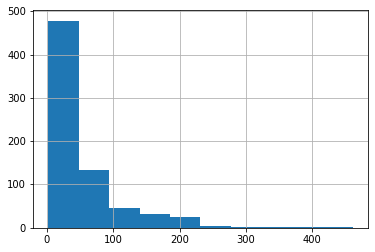

In [5]:
pollution_raw['Единица данных: количество'].hist()

Так как в среднем на всех участках было отобрано равное количество проб, то колонку **Единица данных: количество**<br>
    можно тоже опустить. Так же не несет большой инф. нагрузки широта и долгота участков моря, а так же максимальное
    и минимальное значение на каждом участке

In [6]:
#Посмотрим на типы загрязнения:
pollution_raw['Параметр: код'].unique()

array(['TPHs', 'СПАВ', 'Фенолы'], dtype=object)

Видим, что в сэте представленны только 3 вида загрязнения. Поэтому ПДК и единицы измерения можно записать  в само название 
колонки загрязнителя.<br>
**TPHs** - total petroleum hydrocarbons<br>
**СПАВ** - синтетические поверхностно активные вещества<br>
**Фенолы** - производные ароматических углеводородов

Удаляем малоинформативные колонки:

In [7]:
pollution_raw = pollution_raw.drop(['Единица данных: идентификатор','Единица данных: количество','Геообъект: код',\
                'Параметр: значение (max)', 'Параметр: значение (min)', 'Долгота точки (град., дес.доли град)',\
              'Широта точки (град., дес.доли град)', 'Единица измерения', 'Показатель' ], axis=1)

In [8]:
#Посмотрим на результат удаления
pollution_raw.head()

,Описание,Геообъект: идентификатор,Геообъект: название,Параметр: код,Параметр: значение,Год
0,Панагия-Кубань,1508,Азовское море,TPHs,0.1624,1995
1,Панагия-Кубань,1508,Азовское море,СПАВ,31.9902,1995
2,Панагия-Кубань,1508,Азовское море,TPHs,0.1653,1997
3,Панагия-Кубань,1508,Азовское море,СПАВ,43.9145,1997
4,Панагия-Кубань,1508,Азовское море,TPHs,0.0432,1998


Для более удобного анализа и визуализации разделим колонку **Параметр: код** на три колонки по типу загрязнения:

In [9]:
pollution = pollution_raw.pivot_table(index=['Геообъект: название','Описание','Год','Геообъект: идентификатор'], \
                                      columns='Параметр: код', values='Параметр: значение')
pollution.sample(5)

Параметр: код                                                       TPHs  \
Геообъект: название Описание       Год  Геообъект: идентификатор           
Каспийское море     Терек          1997 3502                      0.1464   
                    Махачкала      2009 3504                      0.0579   
                    Сулак          2006 3503                      0.0413   
Чёрное море         Панагия-Кубань 2013 1508                      0.0395   
Белое море          Двинский залив 1998 5101                      0.0183   

Параметр: код                                                        СПАВ  \
Геообъект: название Описание       Год  Геообъект: идентификатор            
Каспийское море     Терек          1997 3502                          NaN   
                    Махачкала      2009 3504                       0.0041   
                    Сулак          2006 3503                          NaN   
Чёрное море         Панагия-Кубань 2013 1508                      10.3094   
Белое море          Двинский залив 1998 5101                          NaN   

Параметр: код                                                     Фенолы  
Геообъект: название Описание       Год  Геообъект: идентификатор          
Каспийское море     Терек          1997 3502                      0.0095  
                    Махачкала      2009 3504                      0.0035  
                    Сулак          2006 3503                      0.0030  
Чёрное море         Панагия-Кубань 2013 1508                         NaN  
Белое море          Двинский залив 1998 5101                         NaN

In [10]:
#После решейпа таблицы 4 колонки оказались индексами, сбросим их
pollution=pollution.reset_index()

Переименуем названия колонок в более понятные для обычного пользователя, а также не забываем занести ПДК и единицы измерения в название
самих колонок с типом загрязнения

In [11]:
pollution = pollution.rename(columns={'Геообъект: название': 'Море', \
                            'Описание':'Участок', 'Геообъект: идентификатор':'id Участка',\
                            'TPHs': 'TPHs,мг/л(0.05)','СПАВ':'СПАВ,мкг/л(100.00)','Фенолы': 'Фенолы,мкг/л(1.00)' })

In [12]:
#также удаляем название над индексом
pollution = pollution.rename_axis(None, axis=1)
#и посмотрим на наши данные
pollution.head()

,Море,Участок,Год,id Участка,"TPHs,мг/л(0.05)","СПАВ,мкг/л(100.00)","Фенолы,мкг/л(1.00)"
0,Азовское море,Панагия-Кубань,1995,1508,0.1624,31.9902,NaN
1,Азовское море,Панагия-Кубань,1997,1508,0.1653,43.9145,NaN
2,Азовское море,Панагия-Кубань,1998,1508,0.0432,36.8358,NaN
3,Азовское море,Панагия-Кубань,2000,1508,0.0232,25.9811,NaN
4,Азовское море,Панагия-Кубань,2002,1508,0.0226,65.8302,NaN


In [13]:
#после всех преобразований сет имеет форму
pollution.shape

(346, 7)

Теперь после преобразований, посмотрим на некоторые особенности данных, через визуализацию.
Сравним между собой средний показатель одного из загрязнений для всех морей по каждому году:


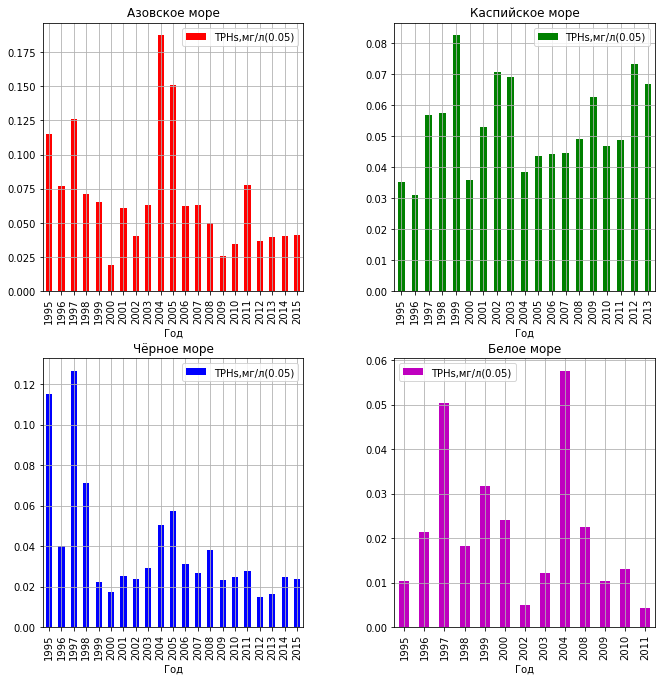

In [14]:
#для этого отфильтруем сэт по названию моря и сгруппируем по году
f,axes = plt.subplots(2,2,figsize=(10,10))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
for sea, color,cor in zip(['Азовское море', 'Каспийское море','Чёрное море','Белое море'],\
                          ['r','g','b','m'],[(0,0),(0,1),(1,0),(1,1)]):
    pollution[pollution['Море']==sea].groupby('Год').agg({'TPHs,мг/л(0.05)':'mean'}).\
    plot.bar(color=color, grid=True,ax=axes[cor],title=sea)

Как видно, для большинства морей характерно высокое значение загрязнения(выше ПДК) для 90х годов и снижение к началу 2010х
Меньше всего уровень загрязнения наблюдается в Черном море, и больше всего в Каспийском море
Однако если мы посмотрим на среднее значение по кадому морю в целом:

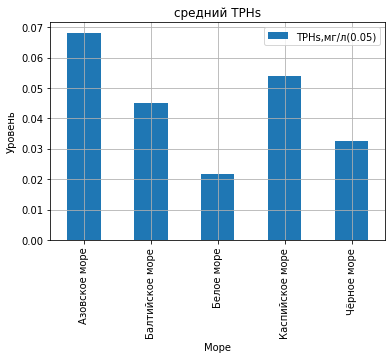

<Figure size 720x720 with 0 Axes>

In [15]:
pollution.groupby('Море').agg({'TPHs,мг/л(0.05)':'mean'}).plot.bar(grid=True)
plt.ylabel('Уровень')
plt.xlabel('Море')
plt.title('средний TPHs')
plt.figure(figsize=(10,10))
plt.show()

То увидим, что средний уровень за весь период в Азовском море выше чем в Каспийском, что можно объяснить большими выбросами
в среднем значении Азовского моря в 2004 и 2005 годах.<br>
С другой можно сравнить показатели загрязнений всех участков определенного моря:

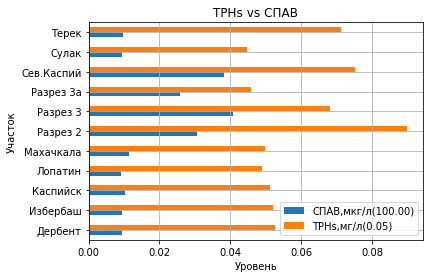

<Figure size 720x720 with 0 Axes>

In [16]:
#сравним показатели для Каспийского моря:
pollution[pollution['Море']=='Каспийское море'].groupby('Участок').agg({'СПАВ,мкг/л(100.00)':'mean','TPHs,мг/л(0.05)':'mean'}).plot.barh(grid=True)
plt.ylabel('Участок')
plt.xlabel('Уровень')
plt.title('TPHs vs СПАВ')
plt.figure(figsize=(10,10))
plt.show()

Средний уровень загрязнения **TPHs** для всех участков приблизительно одиноково высокий, в то время как уровень **СПАВ** достаточно
низкий(намного ниже ПДК)

In [18]:
pollution.to_csv('pollution_clean.csv')